__https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi/data__

## Sensory evaluations (coffee quality scores)
* Aroma - Аромат: *Относится к запаху или аромату кофе.*
* Flavor - Вкус: *Вкус кофе оценивается на основе вкуса, включая сладость, горечь, кислотность и другие вкусовые ноты.*
* Aftertaste - Послевкусие: *относится к стойкому привкусу, который остается во рту после проглатывания кофе.*
* Acidity - Кислотность: *Кислотность кофе означает яркость или живость вкуса.*
* Body - Тело: *Тело кофе относится к густоте или вязкости кофе во рту.*
* Balance - Баланс: *Баланс означает, насколько хорошо различные вкусовые компоненты кофе взаимодействуют друг с другом.*
* Uniformity - Однородность: *Однородность означает консистенцию кофе от чашки к чашке.*
* Clean Cup - Чистая чашка: *под чистой чашкой подразумевается кофе без каких-либо посторонних привкусов или дефектов, таких как кислинка, затхлость или затхлость.*
* Sweetness - Сладость: *ее можно охарактеризовать как карамельную, фруктовую или цветочную, и это желательное качество кофе.*











In [2]:
import pandas as p
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
data = p.read_csv("./archive/df_arabica_clean.csv")

In [4]:
selected_columns = [
    "Aroma",
    "Flavor",
    "Aftertaste",
    "Acidity",
    "Body",
    "Balance",
    #"Uniformity",
    #"Clean Cup",
    #"Sweetness",
    "Overall",
    #"Defects",
    #"Total Cup Points",
    "Moisture Percentage",
    #"Quakers",
]

In [5]:
data[selected_columns].head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Moisture Percentage
0,8.58,8.50,8.42,8.58,8.25,8.42,8.58,11.8
1,8.50,8.50,7.92,8.00,7.92,8.25,8.50,10.5
2,8.33,8.42,8.08,8.17,7.92,8.17,8.33,10.4
3,8.08,8.17,8.17,8.25,8.17,8.08,8.25,11.8
4,8.33,8.33,8.08,8.25,7.92,7.92,8.25,11.6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

array([[<Axes: title={'center': 'Aroma'}>,
        <Axes: title={'center': 'Flavor'}>,
        <Axes: title={'center': 'Aftertaste'}>],
       [<Axes: title={'center': 'Acidity'}>,
        <Axes: title={'center': 'Body'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'Overall'}>,
        <Axes: title={'center': 'Moisture Percentage'}>, <Axes: >]],
      dtype=object)

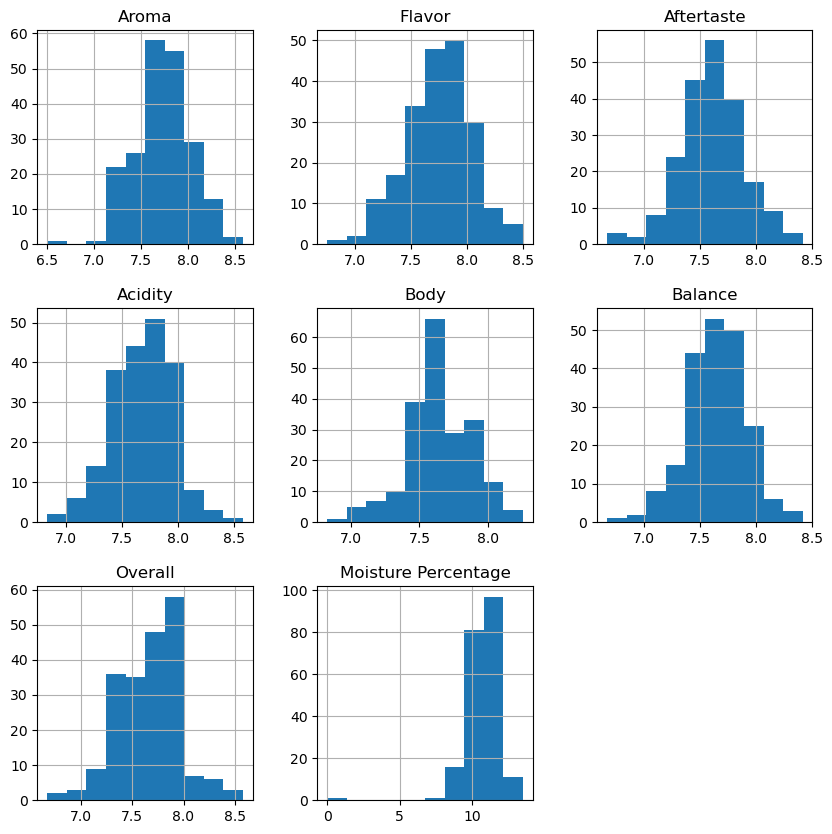

In [8]:
graph_size = 10, 10
data[selected_columns].hist(figsize=graph_size)

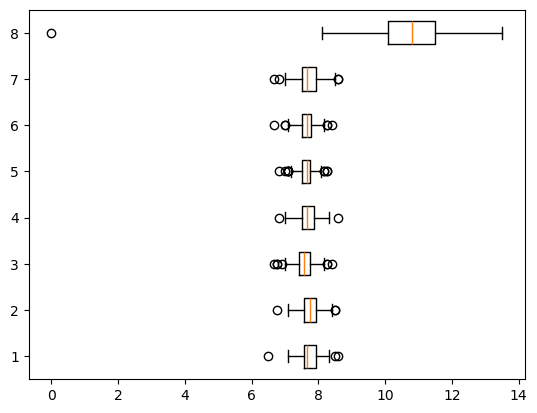

In [9]:
fig, ax = plt.subplots()
ax.boxplot(data[selected_columns], vert = False)
plt.show()

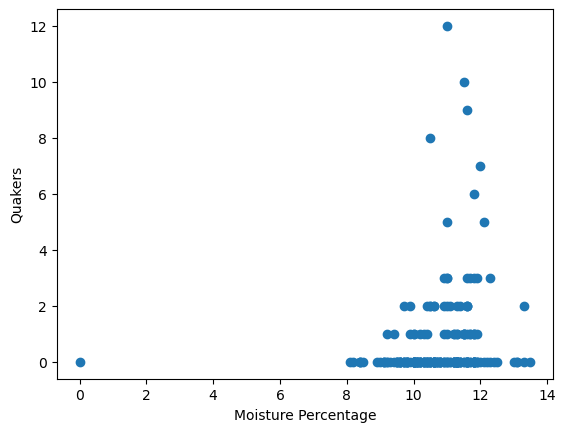

In [10]:
plt.scatter('Moisture Percentage', 'Quakers', data=data)
plt.xlabel('Moisture Percentage')
plt.ylabel('Quakers')
plt.show()

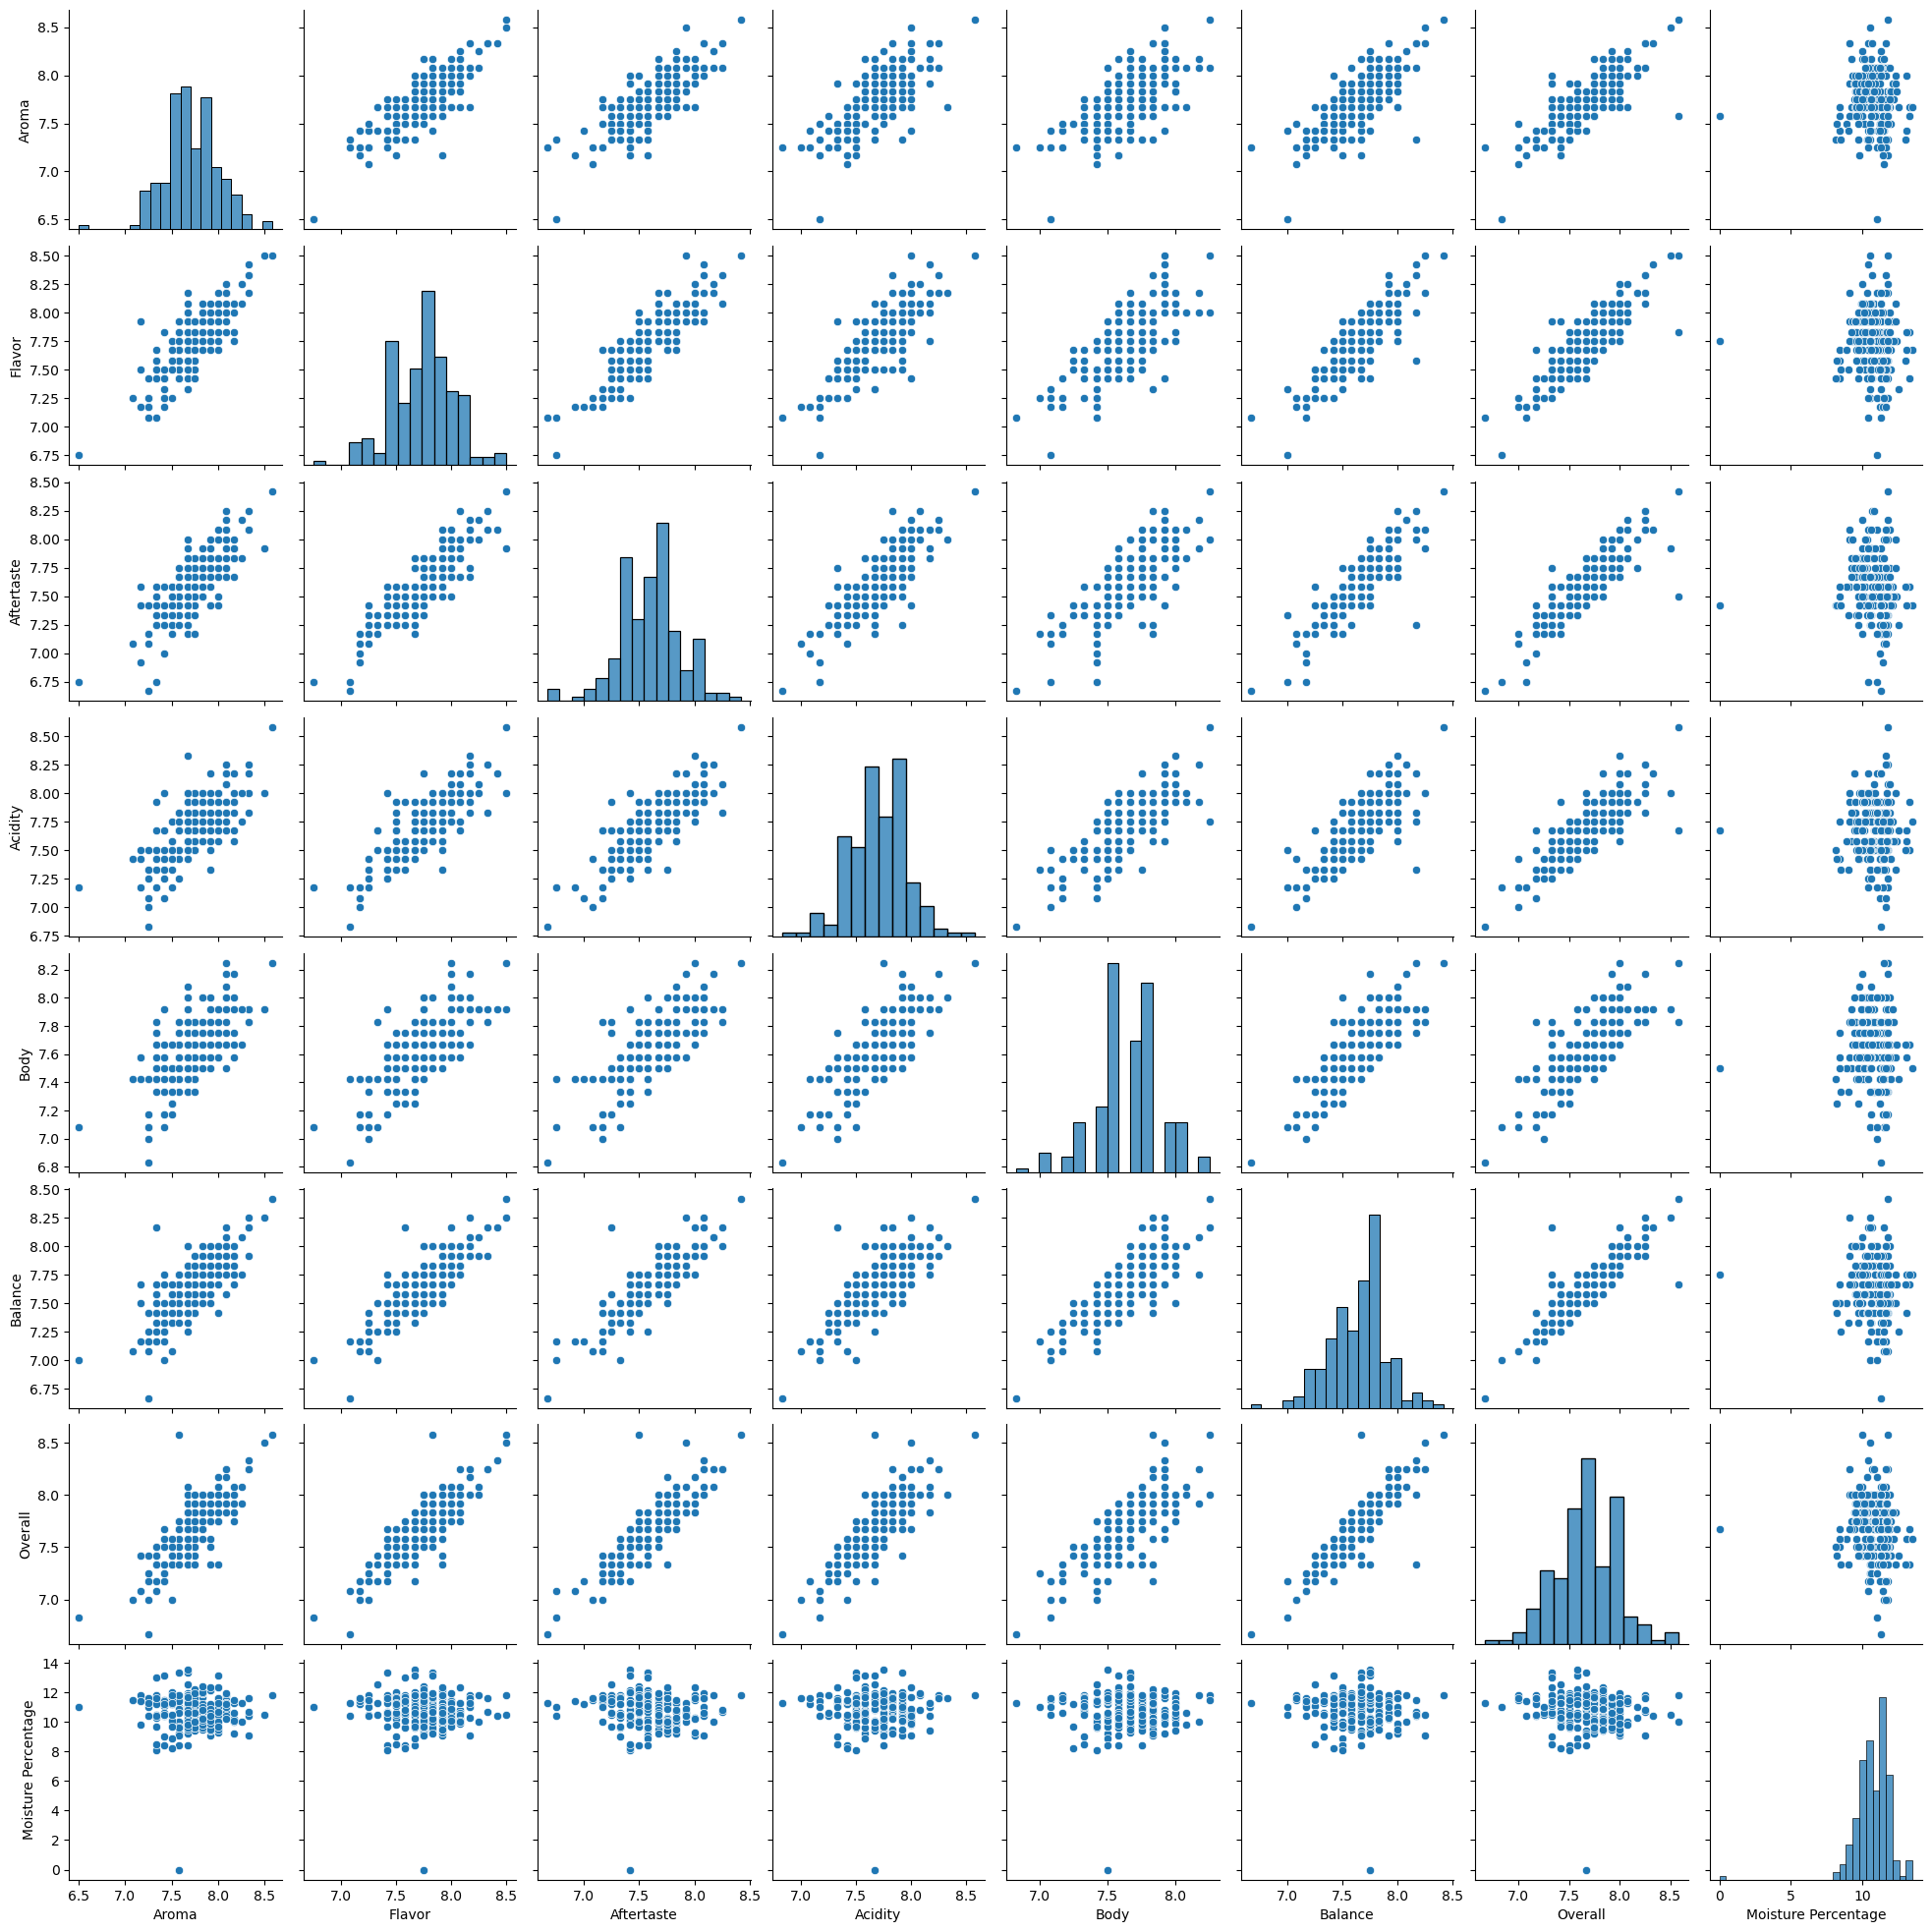

In [11]:
sns.pairplot(
    data[selected_columns],
    #height=5
)

<Axes: >

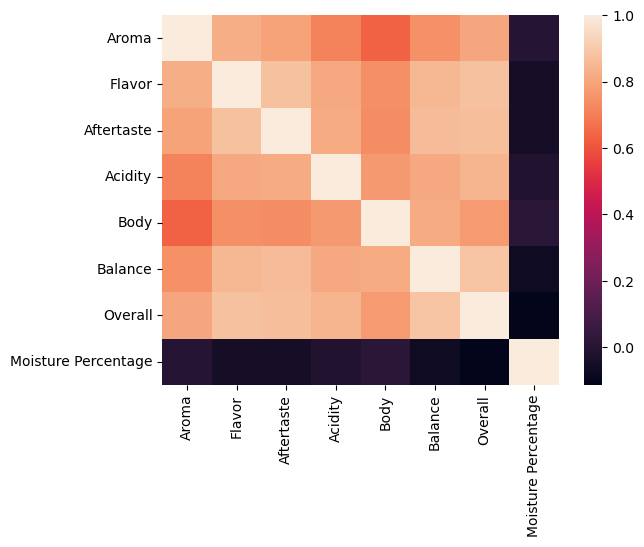

In [12]:
sns.heatmap(data[selected_columns].corr())

In [105]:
Q1 = data[selected_columns].quantile(q=0.25)
Q3 = data[selected_columns].quantile(q=0.75)
IQR = Q3 - Q1
print(data[selected_columns].shape)

(207, 8)


In [112]:
drop_index = np.where((data[selected_columns]<Q1-1.5*IQR) | (data[selected_columns]>Q3+1.5*IQR))[0]
drop_index = np.unique(drop_index)

data_without_outlier = data.drop(labels=drop_index, axis='index')

print(data_without_outlier[selected_columns].shape)

(189, 8)


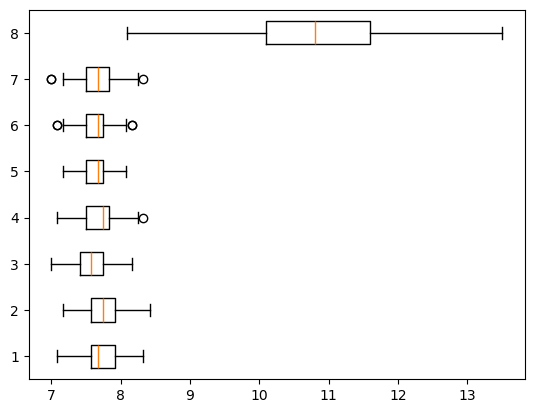

In [113]:
fig, ax = plt.subplots()
ax.boxplot(data_without_outlier[selected_columns], vert = False)
plt.show()

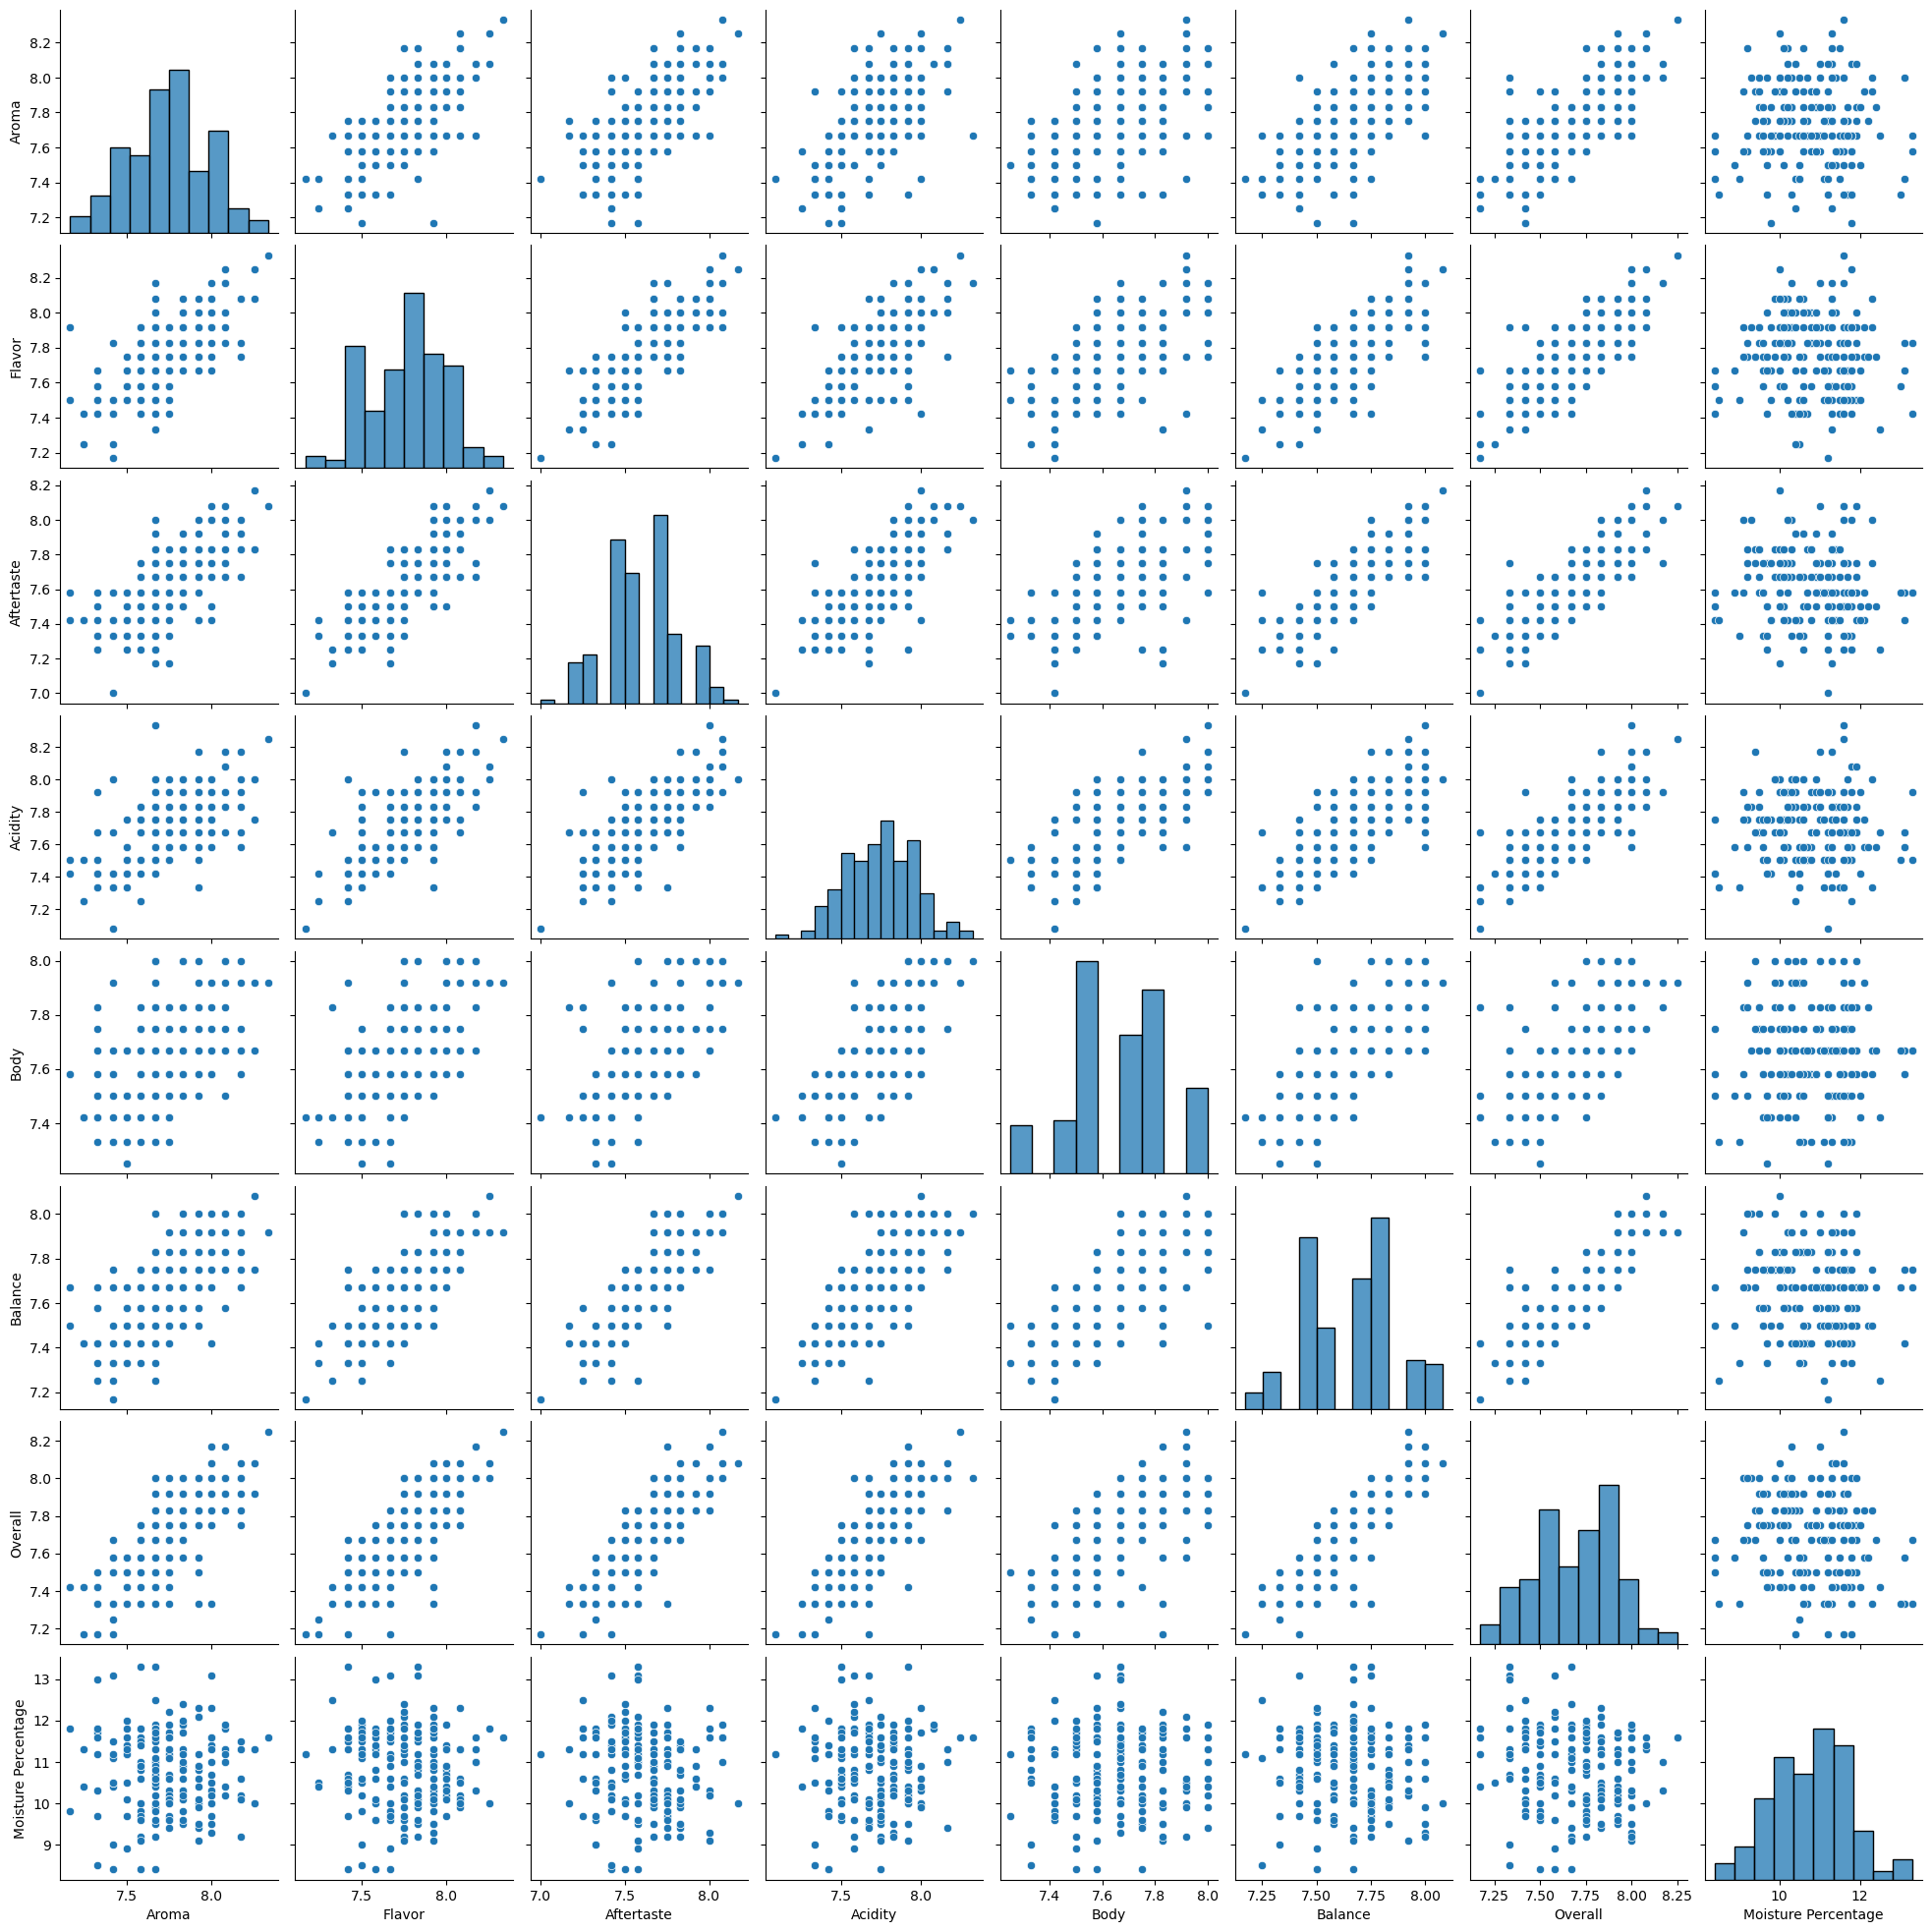

In [94]:
sns.pairplot(
    data_without_outlier[selected_columns],
    #height=5
)